In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Load your time series data (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('../Datasets_1/Training Dataset/Reliance_Industries_Ltd.csv')

# Define a function to perform ARIMA grid search and return the best model
def arima_grid_search(data, p_values, d_values, q_values):
    best_aic = np.inf
    best_order = None

    for p, d, q in product(p_values, d_values, q_values):
        order = (p, d, q)
        try:
            model = ARIMA(data, order=order)
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_order = order
        except:
            continue

    return best_order

# Define the ranges for p, d, and q
p_values = range(0, 4)  # adjust the range based on your data and expectations
d_values = range(0, 2)  # adjust the range based on your data and expectations
q_values = range(0, 4)  # adjust the range based on your data and expectations

# Perform grid search
best_order = arima_grid_search(df['Close'], p_values, d_values, q_values)


# # Fit the ARIMA model with the best parameters
best_model = ARIMA(df['Close'], order=best_order)
best_model_fit = best_model.fit()

# # Print the best parameters and model summary
print(f'Best ARIMA Order: {best_order}')
print(best_model_fit.summary())

D:\Programs\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Programs\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Programs\anaconda3\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA Order: (2, 1, 2)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2708
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10300.936
Date:                Tue, 05 Dec 2023   AIC                          20611.872
Time:                        00:44:58   BIC                          20641.390
Sample:                             0   HQIC                         20622.545
                               - 2708                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3134      0.072     18.370      0.000       1.173       1.454
ar.L2         -0.6218      0.075     -8.292      0.000      -0.769      -0.475
ma.L1         -1.2380   

(array([6.21703175e-03, 6.52788334e-03, 4.70987254e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.70987254e-06]),
 array([-7.86709387e+01, -2.66222714e-01,  7.81384933e+01,  1.56543209e+02,
         2.34947925e+02,  3.13352641e+02,  3.91757357e+02,  4.70162073e+02,
         5.48566789e+02,  6.26971505e+02,  7.05376221e+02]),
 <BarContainer object of 10 artists>)

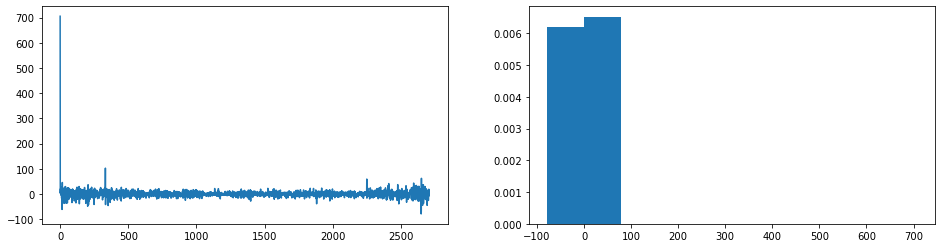

In [7]:
import matplotlib.pyplot as plt

residuals=pd.DataFrame(best_model_fit.resid)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

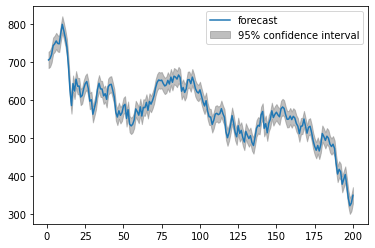

In [8]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(best_model_fit,start=1,end=200,dynamic=False,alpha=0.05);

1      705.383254
2      708.996255
3      719.947812
4      742.854031
5      747.751162
          ...    
238    335.356706
239    333.606974
240    316.972908
241    311.954623
242    308.592550
Name: predicted_mean, Length: 242, dtype: float64


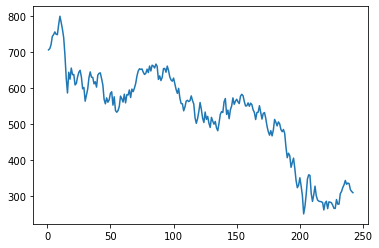

In [9]:
next_day_price=best_model_fit.get_prediction(start=1,end=242,alpha=0.05)
print(next_day_price.predicted_mean)
plt.plot(next_day_price.predicted_mean)

No handles with labels found to put in legend.


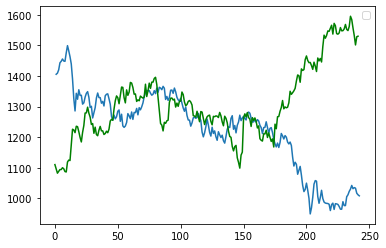

In [10]:
import pandas as pd
import matplotlib.pyplot as plt



test=pd.read_csv("../Datasets_1/Testing Dataset/Reliance_Industries_Ltd.csv")
plt.plot(next_day_price.predicted_mean+700);
plt.plot(test['Close'], color="green")
plt.legend()
plt.show()

In [16]:
next_day_price.predicted_mean.describe()

count    242.000000
mean     525.723281
std      128.903374
min      249.515403
25%      481.303110
50%      555.550763
75%      619.708327
max      798.861316
Name: predicted_mean, dtype: float64

In [28]:
tf = test['Close']
fc=next_day_price.predicted_mean[100:130]
test_data = tf[100:130]

No handles with labels found to put in legend.


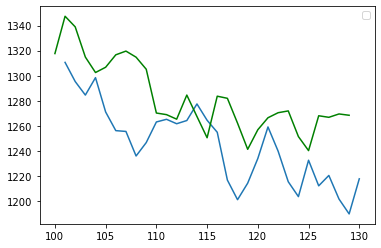

In [29]:
plt.plot(fc+700);
plt.plot(test_data, color="green")
plt.legend()
plt.show()